# Projet

In [34]:
# Importations nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Exploration et analyse des données


In [35]:
# Chargement du dataset
url = "https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset"

# Télécharger le dataset depuis Kaggle et le charger localement
data = pd.read_csv("data/gym_members_exercise_tracking.csv")

# Aperçu des données
data.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [36]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [37]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [38]:
# Analyse des données

import seaborn as sns
import matplotlib.pyplot as plt

# Vérification des valeurs manquantes
print(data.isnull().sum())



Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [39]:
data.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

## 2. Nettoyage et préparation des données


In [40]:
from sklearn.preprocessing import OneHotEncoder

# Encodage des variables catégorielles
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(data[['Gender', 'Workout_Type']])
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['Gender', 'Workout_Type']))


# Concaténation avec le dataset original
data = pd.concat([data, encoded_df], axis=1)
data.drop(['Gender', 'Workout_Type'], axis=1, inplace=True)

In [41]:
data

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1.0,0.0,0.0,1.0
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0.0,1.0,0.0,0.0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0.0,0.0,0.0,0.0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1.0,0.0,1.0,0.0
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,1.0,0.0,1.0,0.0
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,1.0,0.0,1.0,0.0
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,0.0,0.0,0.0,0.0
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,1.0,1.0,0.0,0.0


In [42]:
data.dtypes

Age                                int64
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
Gender_Male                      float64
Workout_Type_HIIT                float64
Workout_Type_Strength            float64
Workout_Type_Yoga                float64
dtype: object

In [43]:
# #Normalisation des données

# from sklearn.preprocessing import StandardScaler

# # Normalisation des variables numériques
# scaler = StandardScaler()
# numerical_features = ['Age', 'Weight (kg)', 'Height (m)','Max_BPM',	'Avg_BPM','Resting_BPM', 'Session_Duration (hours)']
# data[numerical_features] = scaler.fit_transform(data[numerical_features])

### Recherche des valeurs aberrantes

In [44]:
# Chargement des données (remplacez par votre chemin)
# data = pd.read_csv("data/gym_members_exercise_tracking.csv")

# 1. Identification des Outliers avec la méthode IQR
def detect_and_correct_outliers(data):
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifier les outliers
        outliers = ((data[col] < lower_bound) | (data[col] > upper_bound))
        print(f"Colonne {col}: {outliers.sum()} outliers")

        # Correction : remplacer les outliers par les bornes
        data.loc[data[col] < lower_bound, col] = lower_bound
        data.loc[data[col] > upper_bound, col] = upper_bound

    return data

# Appliquer la fonction pour corriger les outliers
data_corrected = detect_and_correct_outliers(data)




Colonne Age: 0 outliers
Colonne Weight (kg): 9 outliers
Colonne Height (m): 0 outliers
Colonne Max_BPM: 0 outliers
Colonne Avg_BPM: 0 outliers
Colonne Resting_BPM: 0 outliers
Colonne Session_Duration (hours): 0 outliers
Colonne Calories_Burned: 10 outliers
Colonne Fat_Percentage: 0 outliers
Colonne Water_Intake (liters): 0 outliers
Colonne Workout_Frequency (days/week): 0 outliers
Colonne Experience_Level: 0 outliers
Colonne BMI: 25 outliers
Colonne Gender_Male: 0 outliers
Colonne Workout_Type_HIIT: 221 outliers
Colonne Workout_Type_Strength: 0 outliers
Colonne Workout_Type_Yoga: 239 outliers


In [45]:
# 2. Vérification après correction
print("\nRésultats après correction :")
for col in data_corrected.select_dtypes(include=[np.number]).columns:
    Q1 = data_corrected[col].quantile(0.25)
    Q3 = data_corrected[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((data_corrected[col] < lower_bound) | (data_corrected[col] > upper_bound))
    print(f"Colonne {col}: {outliers.sum()} outliers")



Résultats après correction :
Colonne Age: 0 outliers
Colonne Weight (kg): 0 outliers
Colonne Height (m): 0 outliers
Colonne Max_BPM: 0 outliers
Colonne Avg_BPM: 0 outliers
Colonne Resting_BPM: 0 outliers
Colonne Session_Duration (hours): 0 outliers
Colonne Calories_Burned: 0 outliers
Colonne Fat_Percentage: 0 outliers
Colonne Water_Intake (liters): 0 outliers
Colonne Workout_Frequency (days/week): 0 outliers
Colonne Experience_Level: 0 outliers
Colonne BMI: 0 outliers
Colonne Gender_Male: 0 outliers
Colonne Workout_Type_HIIT: 0 outliers
Colonne Workout_Type_Strength: 0 outliers
Colonne Workout_Type_Yoga: 0 outliers


In [46]:
data_corrected

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56.0,88.3,1.71,180,157.0,60,1.69,1313.0,12.6,3.5,4.0,3.0,30.20,1.0,0.0,0.0,0.0
1,46.0,74.9,1.53,179,151.0,66,1.30,883.0,33.9,2.1,4.0,2.0,32.00,0.0,0.0,0.0,0.0
2,32.0,68.1,1.66,167,122.0,54,1.11,677.0,33.4,2.3,4.0,2.0,24.71,0.0,0.0,0.0,0.0
3,25.0,53.2,1.70,190,164.0,56,0.59,532.0,28.8,2.1,3.0,1.0,18.41,1.0,0.0,1.0,0.0
4,38.0,46.1,1.79,188,158.0,68,0.64,556.0,29.2,2.8,3.0,1.0,14.39,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24.0,87.1,1.74,187,158.0,67,1.57,1364.0,10.0,3.5,4.0,3.0,28.77,1.0,0.0,1.0,0.0
969,25.0,66.6,1.61,184,166.0,56,1.38,1260.0,25.0,3.0,2.0,1.0,25.69,1.0,0.0,1.0,0.0
970,59.0,60.4,1.76,194,120.0,53,1.72,929.0,18.8,2.7,5.0,3.0,19.50,0.0,0.0,0.0,0.0
971,32.0,126.4,1.83,198,146.0,62,1.10,883.0,28.2,2.1,3.0,2.0,37.74,1.0,0.0,0.0,0.0


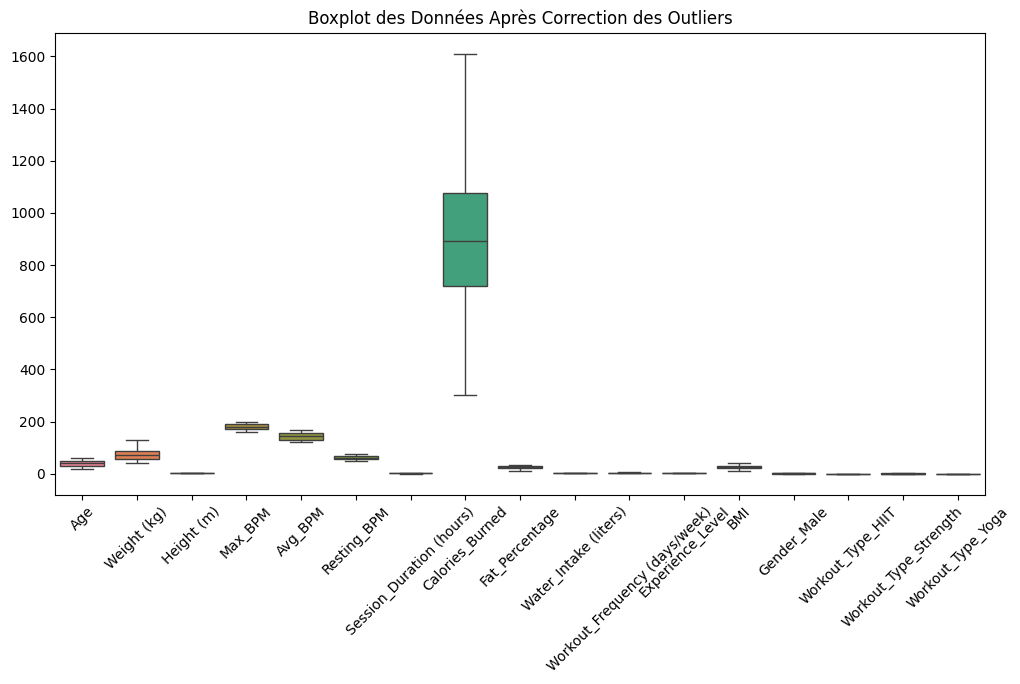

In [47]:
# 3. Visualisation des données après correction
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_corrected.select_dtypes(include=[np.number]))
plt.title("Boxplot des Données Après Correction des Outliers")
plt.xticks(rotation=45)
plt.show()


### Division en ensembles d'entraînement et de test
La division en ensembles d'entraînement et de test est une étape crucial dans le processus de formation d'un modèle de machine learning.

In [48]:
from sklearn.model_selection import train_test_split

# Séparation des features et de la cible
X = data.drop('Calories_Burned', axis=1)
y = data['Calories_Burned']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
data

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56.0,88.3,1.71,180,157.0,60,1.69,1313.0,12.6,3.5,4.0,3.0,30.20,1.0,0.0,0.0,0.0
1,46.0,74.9,1.53,179,151.0,66,1.30,883.0,33.9,2.1,4.0,2.0,32.00,0.0,0.0,0.0,0.0
2,32.0,68.1,1.66,167,122.0,54,1.11,677.0,33.4,2.3,4.0,2.0,24.71,0.0,0.0,0.0,0.0
3,25.0,53.2,1.70,190,164.0,56,0.59,532.0,28.8,2.1,3.0,1.0,18.41,1.0,0.0,1.0,0.0
4,38.0,46.1,1.79,188,158.0,68,0.64,556.0,29.2,2.8,3.0,1.0,14.39,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24.0,87.1,1.74,187,158.0,67,1.57,1364.0,10.0,3.5,4.0,3.0,28.77,1.0,0.0,1.0,0.0
969,25.0,66.6,1.61,184,166.0,56,1.38,1260.0,25.0,3.0,2.0,1.0,25.69,1.0,0.0,1.0,0.0
970,59.0,60.4,1.76,194,120.0,53,1.72,929.0,18.8,2.7,5.0,3.0,19.50,0.0,0.0,0.0,0.0
971,32.0,126.4,1.83,198,146.0,62,1.10,883.0,28.2,2.1,3.0,2.0,37.74,1.0,0.0,0.0,0.0


## 3. Essais de modèles


-----------------------------------------

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [51]:
# Initialisation des modèles
models = {
    'Régression Linéaire': LinearRegression(),
    'Arbre de décision' : DecisionTreeRegressor(),
    'Forêt Aléatoire': RandomForestRegressor()
}

In [52]:
# Entraînement et évaluation des modèles
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calcul des métriques
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

    print(f"--- {name} ---")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}\n")


--- Régression Linéaire ---
RMSE: 39.088579374543464
MAE: 29.15283459940493
R²: 0.9813682191961519

--- Arbre de décision ---
RMSE: 68.85734044626857
MAE: 53.14871794871795
R²: 0.9421830628133895



--- Forêt Aléatoire ---
RMSE: 48.25638867230232
MAE: 36.558
R²: 0.9716035383376964



In [53]:
# Affichage des résultats
for model, metrics in results.items():
    print(f"{model}:")
    print(f"- MAE: {metrics['MAE']:.2f}")
    print(f"- RMSE: {metrics['RMSE']:.2f}")
    print(f"- R²: {metrics['R²']:.2f}\n")


Régression Linéaire:
- MAE: 29.15
- RMSE: 39.09
- R²: 0.98

Arbre de décision:
- MAE: 53.15
- RMSE: 68.86
- R²: 0.94

Forêt Aléatoire:
- MAE: 36.56
- RMSE: 48.26
- R²: 0.97



## 4. Calcul et comparaison des métriques


### Tableau comparatif des performances


In [54]:
# Création du tableau de comparaison
results_df = pd.DataFrame(results).T
results_df.columns = ["MAE", "RMSE", "R²"]
print("Tableau de comparaison des résultats :")

# Classement des modèles par R² (le meilleur modèle a le R² le plus élevé)
results_df_sorted = results_df.sort_values(by="R²", ascending=False)

print(results_df_sorted)


Tableau de comparaison des résultats :
                           MAE       RMSE        R²
Régression Linéaire  29.152835  39.088579  0.981368
Forêt Aléatoire      36.558000  48.256389  0.971604
Arbre de décision    53.148718  68.857340  0.942183


#### Justificatif du Classement

Le meilleur modèle est celui qui a le **R² le plus élevé**, car il explique une plus grande proportion de la variance des données. Ensuite, nous considérons le **RMSE** et le **MAE** : plus ces valeurs sont faibles, plus les prédictions du modèle sont précises.

Voici pourquoi ce classement a été établi :



In [55]:
print("Voici pourquoi ce classement a été établi :")
print(f"1. {results_df_sorted.index[0]} : R² le plus élevé ({results_df_sorted.iloc[0]['R²']:.2f}), RMSE et MAE faibles.")
print(f"2. {results_df_sorted.index[1]} : R² élevé ({results_df_sorted.iloc[1]['R²']:.2f}), mais RMSE et MAE légèrement plus élevés que le premier.")
print(f"3. {results_df_sorted.index[2]} : R² plus faible ({results_df_sorted.iloc[2]['R²']:.2f}) et RMSE/MAE plus élevés.")

Voici pourquoi ce classement a été établi :
1. Régression Linéaire : R² le plus élevé (0.98), RMSE et MAE faibles.
2. Forêt Aléatoire : R² élevé (0.97), mais RMSE et MAE légèrement plus élevés que le premier.
3. Arbre de décision : R² plus faible (0.94) et RMSE/MAE plus élevés.


## Amélioration du modèle

#### Fine-tuning avec GridSearchCV

-------

In [56]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
import numpy as np

# Définition des hyperparamètres à tester
param_grid = {
    'alpha': np.logspace(-4, 4, 20),  # Forces de régularisation variées
    'fit_intercept': [True, False]    # Avec ou sans intercept
}

# Ridge Regression
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_ridge.fit(X_train, y_train)

print("Meilleurs paramètres Ridge:", grid_ridge.best_params_)
print("Score R² Ridge:", grid_ridge.best_score_)


Meilleurs paramètres Ridge: {'alpha': 0.08858667904100823, 'fit_intercept': True}
Score R² Ridge: 0.9791960567356467


In [57]:
# Sauvegarde du meilleur modèle Ridge
import joblib
joblib.dump(grid_ridge.best_estimator_, 'best_ridge_model.pkl')

['best_ridge_model.pkl']

In [58]:
data

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56.0,88.3,1.71,180,157.0,60,1.69,1313.0,12.6,3.5,4.0,3.0,30.20,1.0,0.0,0.0,0.0
1,46.0,74.9,1.53,179,151.0,66,1.30,883.0,33.9,2.1,4.0,2.0,32.00,0.0,0.0,0.0,0.0
2,32.0,68.1,1.66,167,122.0,54,1.11,677.0,33.4,2.3,4.0,2.0,24.71,0.0,0.0,0.0,0.0
3,25.0,53.2,1.70,190,164.0,56,0.59,532.0,28.8,2.1,3.0,1.0,18.41,1.0,0.0,1.0,0.0
4,38.0,46.1,1.79,188,158.0,68,0.64,556.0,29.2,2.8,3.0,1.0,14.39,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24.0,87.1,1.74,187,158.0,67,1.57,1364.0,10.0,3.5,4.0,3.0,28.77,1.0,0.0,1.0,0.0
969,25.0,66.6,1.61,184,166.0,56,1.38,1260.0,25.0,3.0,2.0,1.0,25.69,1.0,0.0,1.0,0.0
970,59.0,60.4,1.76,194,120.0,53,1.72,929.0,18.8,2.7,5.0,3.0,19.50,0.0,0.0,0.0,0.0
971,32.0,126.4,1.83,198,146.0,62,1.10,883.0,28.2,2.1,3.0,2.0,37.74,1.0,0.0,0.0,0.0


In [59]:
data.dtypes

Age                              float64
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                          float64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
Gender_Male                      float64
Workout_Type_HIIT                float64
Workout_Type_Strength            float64
Workout_Type_Yoga                float64
dtype: object

In [60]:
data.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56.0,88.3,1.71,180,157.0,60,1.69,1313.0,12.6,3.5,4.0,3.0,30.20,1.0,0.0,0.0,0.0
1,46.0,74.9,1.53,179,151.0,66,1.30,883.0,33.9,2.1,4.0,2.0,32.00,0.0,0.0,0.0,0.0
2,32.0,68.1,1.66,167,122.0,54,1.11,677.0,33.4,2.3,4.0,2.0,24.71,0.0,0.0,0.0,0.0
3,25.0,53.2,1.70,190,164.0,56,0.59,532.0,28.8,2.1,3.0,1.0,18.41,1.0,0.0,1.0,0.0
4,38.0,46.1,1.79,188,158.0,68,0.64,556.0,29.2,2.8,3.0,1.0,14.39,1.0,0.0,1.0,0.0


In [61]:
# Création d'une nouvelle variable : ratio durée/fréquence cardiaque
data['duration_heart_ratio'] = data['Session_Duration (hours)'] / data['Avg_BPM']

# Sélection de variables avec RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Sélection des 5 features les plus importantes
rfe = RFE(estimator=LinearRegression(), n_features_to_select=16)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Variables sélectionnées :", selected_features)

Variables sélectionnées : Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga'],
      dtype='object')


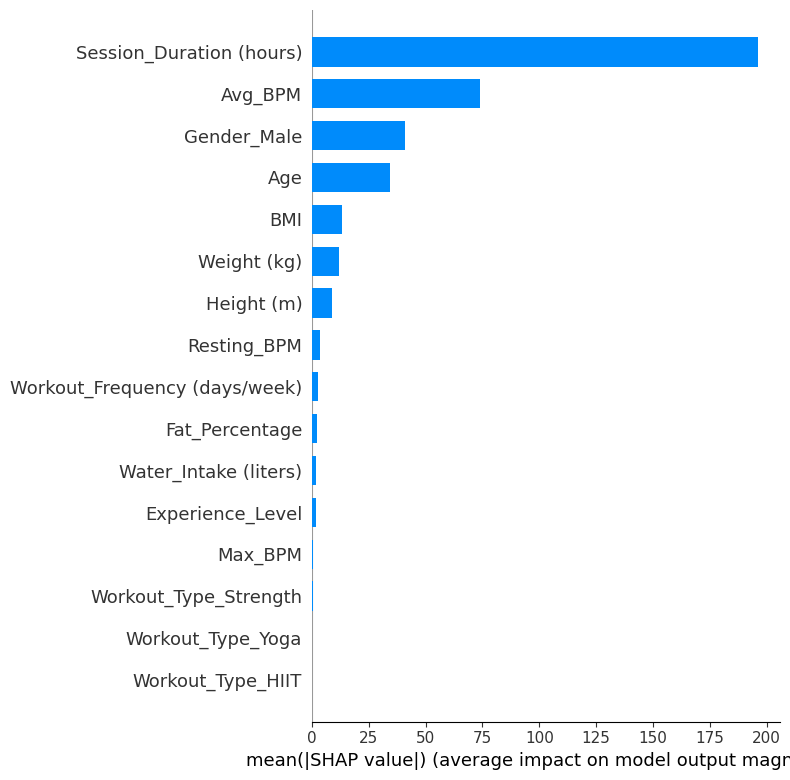

In [63]:
import shap

# Load the best Ridge model
best_ridge = joblib.load('best_ridge_model.pkl')

# Calcul des SHAP values (pour un sous-ensemble de données)
explainer = shap.LinearExplainer(best_ridge, X_train[:100])
shap_values = explainer.shap_values(X_train[:100])

# Visualisation globale
shap.summary_plot(shap_values, X_train[:100], plot_type='bar')